In [5]:
import pandas as pd
df=pd.read_csv("final_dataframe1_1.csv")


In [6]:
df.head()

,timestamp,user,coordinate,pixel_color,coordinate_x,coordinate_y,R,G,B,Day,cluster
0,2023-07-20 14:30:21.109,6gtoR1X4KFRKFfe9fn85wUxAPUHdXbJISc0WDQMjeOaIE2...,"309,102",#B44AC0,309,102,180,74,192,1,2
1,2023-07-20 15:43:20.160,YNMfbbRTXxtCuYU4AoPzSABNtaeDjkLsghOLxybHkYOB7j...,"225,-235",#000000,225,-235,0,0,0,1,1
2,2023-07-20 13:34:27.355,3dAUa5dnQwPC5wJFQMPn/SPub3X5YXbRBPBLKkg1+PqiWe...,"-471,461",#3690EA,-471,461,54,144,234,1,0
3,2023-07-20 15:55:03.453,MXitXa6kyu1HfY5Yq3UHLPw4kQGpr5HUsnsZGPHD7JP0XF...,"-448,-384",#FFD635,-448,-384,255,214,53,1,4
4,2023-07-20 14:36:31.397,t/DtzSJ+u/vhhekerRw/T+pp4F6oCrECcSrGlHZ1u+g75H...,"-462,-451",#000000,-462,-451,0,0,0,1,4


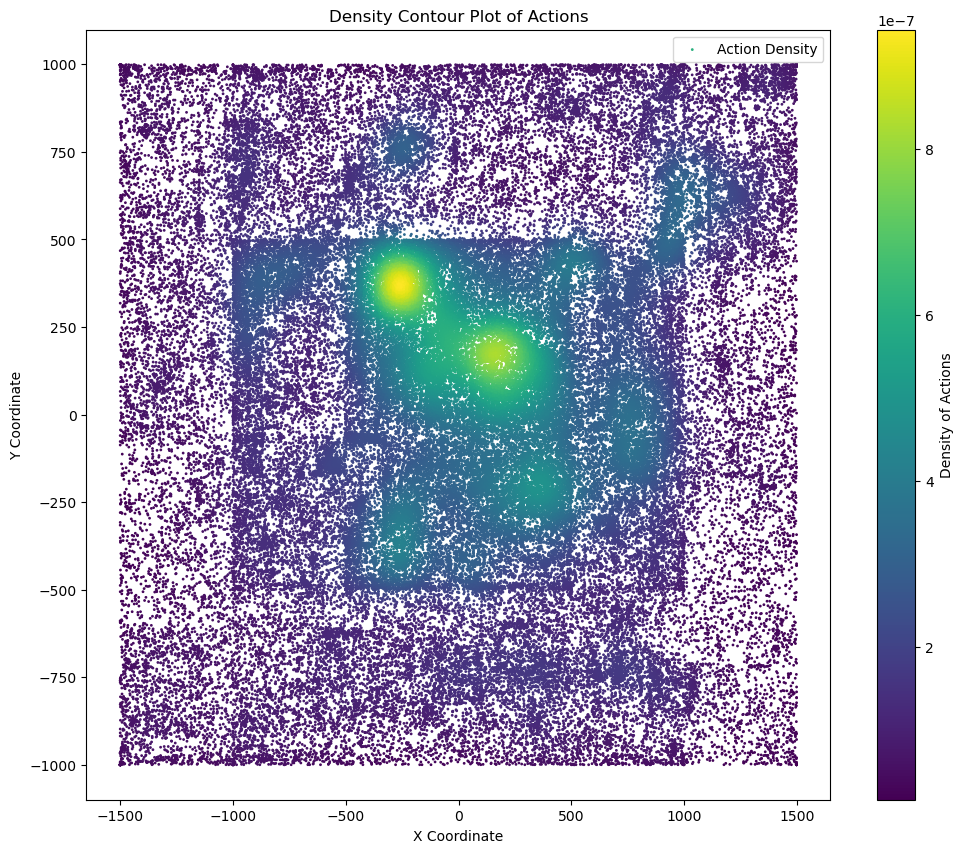

In [7]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

x = df['coordinate_x']
y = df['coordinate_y']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(12, 10))
plt.scatter(x, y, c=z, s=1, cmap='viridis', label='Action Density')
plt.colorbar(label='Density of Actions')
plt.title('Density Contour Plot of Actions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

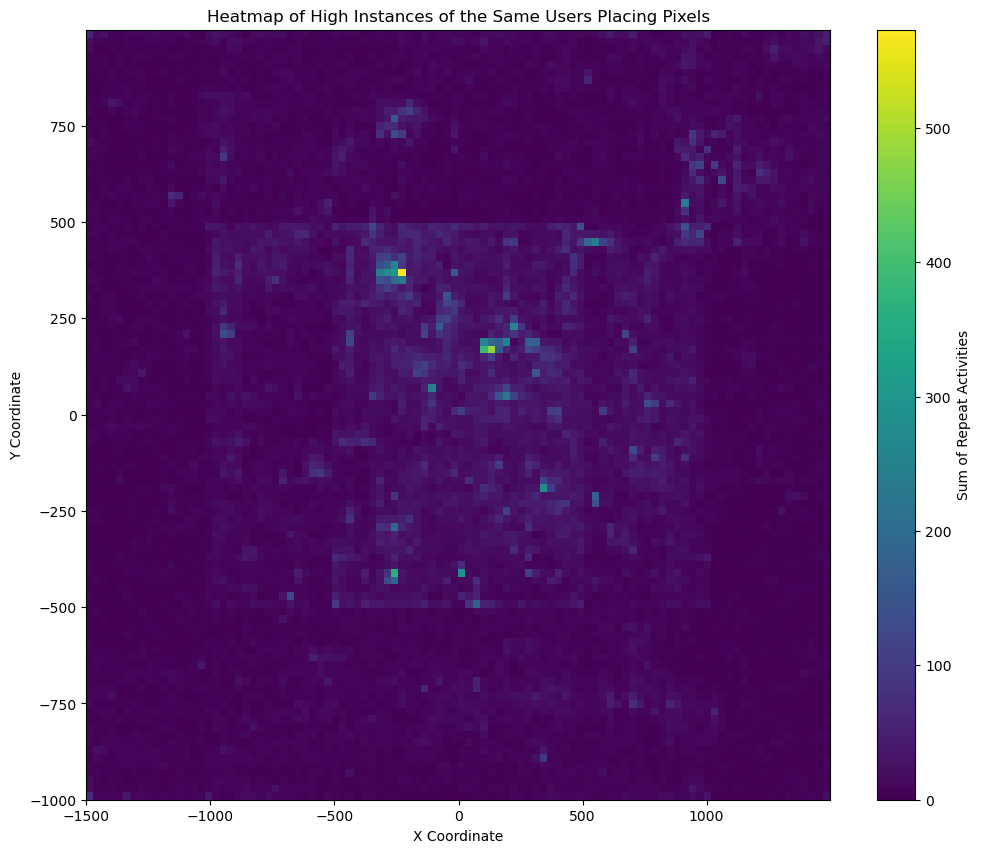

In [8]:
user_activity = df.groupby(['user', 'coordinate_x', 'coordinate_y']).size().reset_index(name='activity_count')
activity_heatmap_data = user_activity.groupby(['coordinate_x', 'coordinate_y'])['activity_count'].sum().reset_index()

heatmap_data, xedges, yedges = np.histogram2d(activity_heatmap_data['coordinate_x'], activity_heatmap_data['coordinate_y'],
                                              bins=100, weights=activity_heatmap_data['activity_count'])


plt.figure(figsize=(12, 10))
plt.imshow(heatmap_data.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', cmap='viridis')
plt.colorbar(label='Sum of Repeat Activities')
plt.title('Heatmap of High Instances of the Same Users Placing Pixels')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

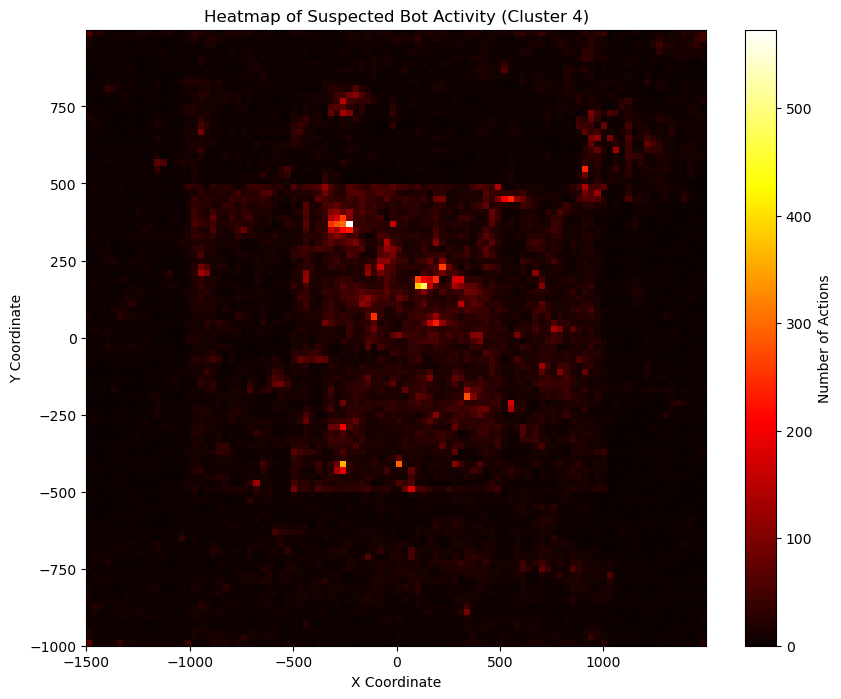

In [9]:
x_min, x_max = df['coordinate_x'].min(), df['coordinate_x'].max()
y_min, y_max = df['coordinate_y'].min(), df['coordinate_y'].max()

n_bins = 100
heatmap, xedges, yedges = np.histogram2d(df['coordinate_x'], df['coordinate_y'], bins=n_bins, range=[[x_min, x_max], [y_min, y_max]])

plt.figure(figsize=(10, 8))
plt.imshow(heatmap.T, origin='lower', extent=[x_min, x_max, y_min, y_max], aspect='auto', cmap='hot')
plt.colorbar(label='Number of Actions')
plt.title('Heatmap of Suspected Bot Activity (Cluster 4)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

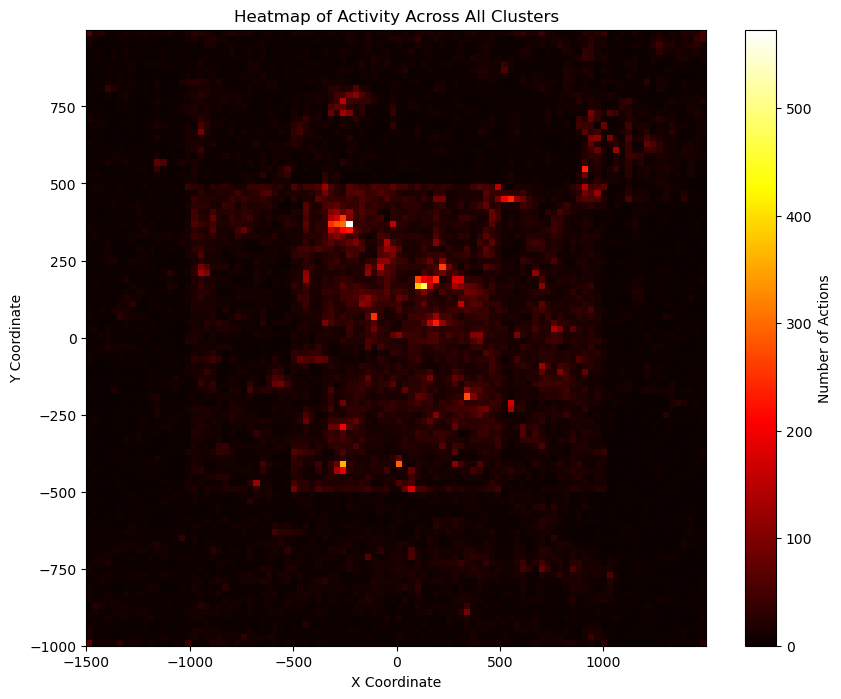

In [10]:
heatmap_all, xedges_all, yedges_all = np.histogram2d(df['coordinate_x'], df['coordinate_y'], bins=n_bins, range=[[x_min, x_max], [y_min, y_max]])
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_all.T, origin='lower', extent=[x_min, x_max, y_min, y_max], aspect='auto', cmap='hot')
plt.colorbar(label='Number of Actions')
plt.title('Heatmap of Activity Across All Clusters')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

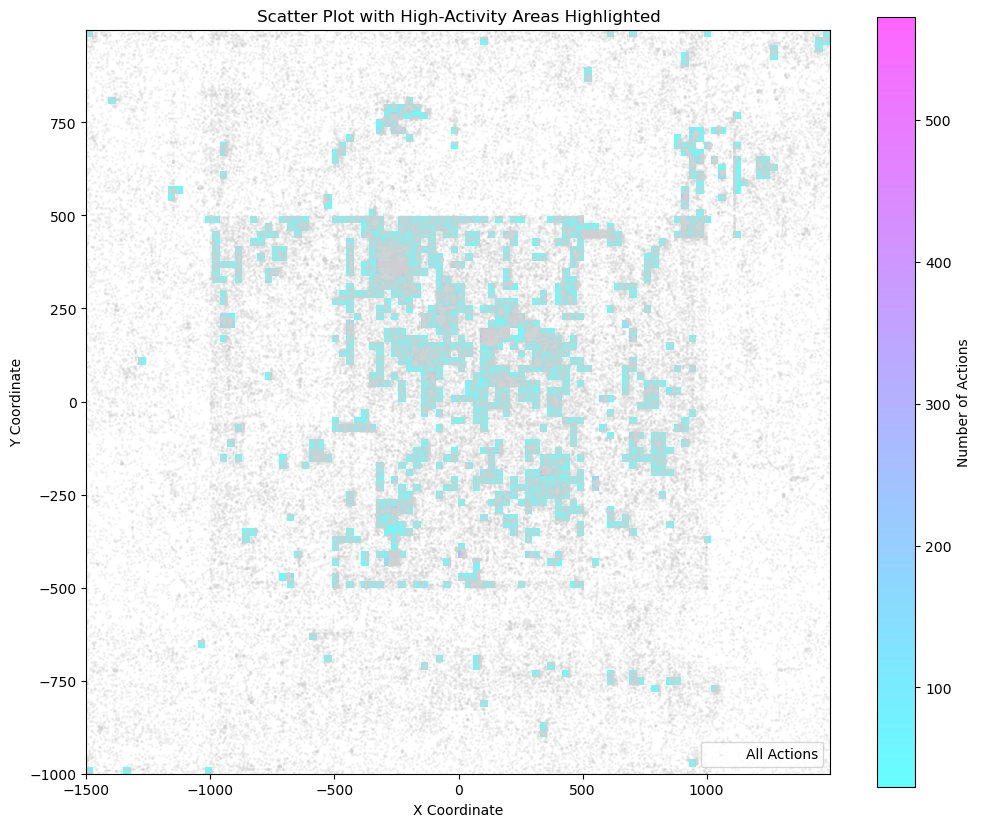

In [11]:
import matplotlib.pyplot as plt

import numpy as np

df['timestamp'] = pd.to_datetime(df['timestamp'])

suspected_bot_cluster = 4
bot_actions = df[df['cluster'] == suspected_bot_cluster]

actions_per_day = bot_actions.resample('D', on='timestamp').count()

x_min, x_max = bot_actions['coordinate_x'].min(), bot_actions['coordinate_x'].max()
y_min, y_max = bot_actions['coordinate_y'].min(), bot_actions['coordinate_y'].max()

n_bins = 100

heatmap, xedges, yedges = np.histogram2d(bot_actions['coordinate_x'], bot_actions['coordinate_y'], bins=n_bins, range=[[x_min, x_max], [y_min, y_max]])

heatmap_all, xedges_all, yedges_all = np.histogram2d(df['coordinate_x'], df['coordinate_y'], bins=n_bins, range=[[x_min, x_max], [y_min, y_max]])

x_min_all, x_max_all = df['coordinate_x'].min(), df['coordinate_x'].max()
y_min_all, y_max_all = df['coordinate_y'].min(), df['coordinate_y'].max()


heatmap_full, xedges_full, yedges_full = np.histogram2d(df['coordinate_x'], df['coordinate_y'], bins=n_bins, range=[[x_min_all, x_max_all], [y_min_all, y_max_all]])


x_range = x_max_all - x_min_all
y_range = y_max_all - y_min_all
aspect_ratio = x_range / y_range

percentile_threshold = 90 
activity_threshold = np.percentile(heatmap_full, percentile_threshold)

masked_heatmap = np.ma.masked_where(heatmap_full <= activity_threshold, heatmap_full)

plt.figure(figsize=(12, 10))

plt.scatter(df['coordinate_x'], df['coordinate_y'], color='lightgrey', alpha=0.2, s=1, label='All Actions')

plt.imshow(masked_heatmap.T, origin='lower', extent=[x_min_all, x_max_all, y_min_all, y_max_all], aspect=aspect_ratio, cmap='cool', alpha=0.6)

plt.colorbar(label='Number of Actions')
plt.title('Scatter Plot with High-Activity Areas Highlighted')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()